<a href="https://colab.research.google.com/github/gokulavel/datascience/blob/master/cervical_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




Logistic Regression Alg

In [ ]:
import pandas as pd
cancer=pd.read_csv("cervical.csv")
cancer

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [ ]:
cancer.keys()

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:
print(cancer.shape)
mean_value=cancer.mean()
cancer=cancer.fillna(mean_value)

(858, 36)


In [ ]:
cancer.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

In [ ]:
cancer.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x=cancer.drop(['Dx:Cancer','Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis'],axis=1)
y=cancer['Dx:Cancer']
print(x.shape)
print(y.shape)
print(x)
print(y)

(858, 9)
(858,)
     Age  STDs: Number of diagnosis  Dx:CIN  Dx:HPV  Dx  Hinselmann  Schiller  \
0     18                          0       0       0   0           0         0   
1     15                          0       0       0   0           0         0   
2     34                          0       0       0   0           0         0   
3     52                          0       0       1   0           0         0   
4     46                          0       0       0   0           0         0   
..   ...                        ...     ...     ...  ..         ...       ...   
853   34                          0       0       0   0           0         0   
854   32                          0       0       0   0           0         0   
855   25                          0       0       0   0           0         0   
856   33                          0       0       0   0           0         0   
857   29                          0       0       0   0           0         0   

     Citolo

In [ ]:
#import warnings
import sklearn
from sklearn.model_selection import train_test_split
#warnings.simplefilter(action="ignore",category=FutureWarning)
X_train, X_test,Y_train, Y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.33, random_state = 6)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(574, 9)
(284, 9)
(574,)
(284,)


In [ ]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver='lbfgs')
lm.fit(X_train,Y_train)
Y_pred = lm.predict(X_test)

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
plt.figure(figsize=(4,3))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Cancer")
plt.ylabel("Predicted Cancer")
plt.title("Cancer vs Predicted Cancer")

Text(0.5, 1.0, 'Cancer vs Predicted Cancer')

In [ ]:
mse=sklearn.metrics.mean_squared_error(Y_test,Y_pred)
print(mse)

0.007042253521126761


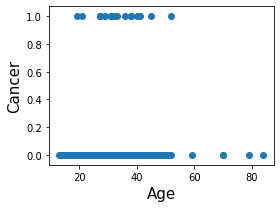

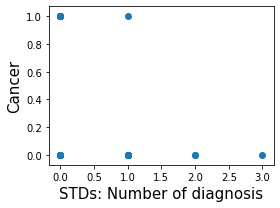

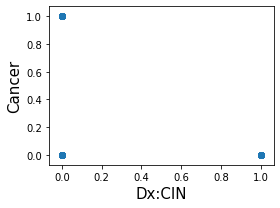

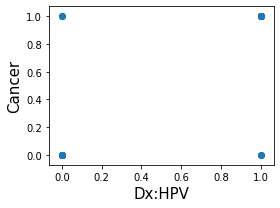

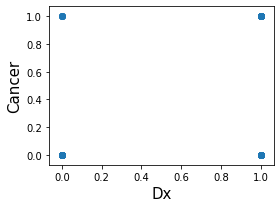

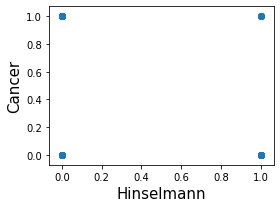

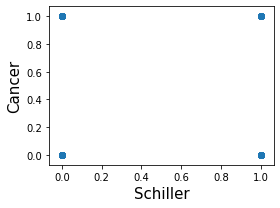

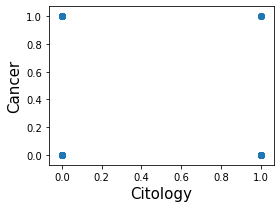

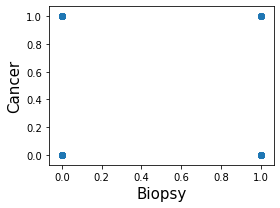

In [ ]:
feature_names=['Age', 'STDs: Number of diagnosis',
       'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy']
for index,feature_name in enumerate(feature_names):
  plt.figure(figsize=(4, 3))
  plt.scatter(cancer[feature_name], cancer['Dx:Cancer'])
  plt.ylabel('Cancer', size=15)
  plt.xlabel(feature_name, size=15)
  plt.tight_layout()

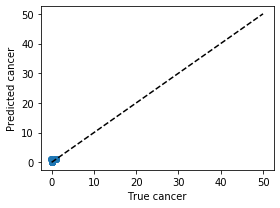

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train,Y_train)

predicted = clf.predict(X_test)
expected = Y_test

plt.figure(figsize=(4, 3))
plt.scatter(predicted, expected)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True cancer')
plt.ylabel('Predicted cancer')
plt.tight_layout()

In [ ]:
mse=sklearn.metrics.mean_squared_error(predicted,expected)
print(mse)

0.008395782398855174


In [ ]:
print(cancer['Dx:Cancer'].unique())
print(cancer.groupby('Dx:Cancer').size())

[0 1]
Dx:Cancer
0    840
1     18
dtype: int64


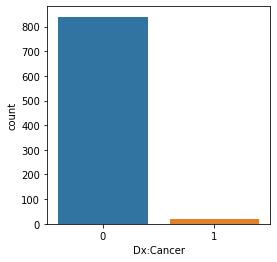

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
fig.set_size_inches(4,4)
sns.countplot(cancer['Dx:Cancer'],label="Count")
plt.show()


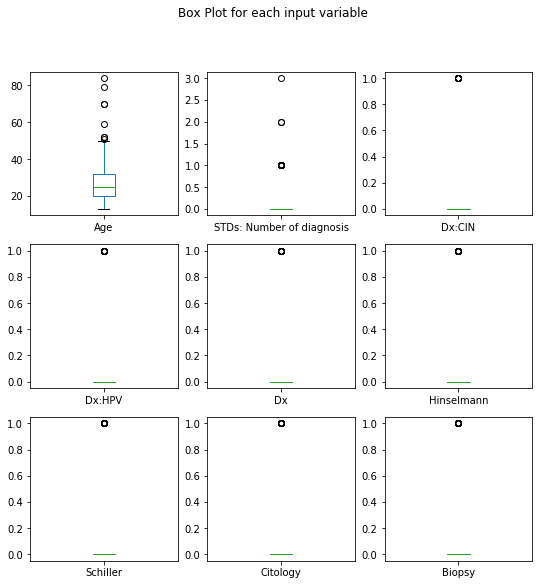

In [ ]:
cancer.drop('Dx:Cancer', axis=1).plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(9,9),title='Box Plot for each input variable')
plt.show()


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
clf = DecisionTreeClassifier().fit(X_train,Y_train)
#y_pred = clf.predict(X_test)
print('Accuracy of Decision Tree classifier on training set: ',clf.score(X_train,Y_train))
print('Accuracy of Decision Tree classifier on test set: ', clf.score(X_test, Y_test))



Accuracy of Decision Tree classifier on training set:  1.0
Accuracy of Decision Tree classifier on test set:  0.9894366197183099


Naive Bayesian

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(X_train,Y_train)
print('Accuracy of Naive Bayesian classifier on training set: {:.2f}'.format(nb.score(X_train,Y_train)))
print('Accuracy of Naive Bayesian classifier on test set: {:.2f}'.format(nb.score(X_test, Y_test)))

Accuracy of Naive Bayesian classifier on training set: 0.94
Accuracy of Naive Bayesian classifier on test set: 0.94


Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,Y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'.format(svm.score(X_train,Y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(X_test, Y_test)))

Accuracy of SVM classifier on training set: 0.98
Accuracy of SVM classifier on test set: 0.98


/home/premkumar/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver='lbfgs')
lm.fit(X_train,Y_train)
print('Accuracy of Logistic Regression on training set: ',lm.score(X_train,Y_train))
print('Accuracy of Logistic Regression on test set: ',lm.score(X_test, Y_test))

Accuracy of Logistic Regression on training set:  0.9947735191637631
Accuracy of Logistic Regression on test set:  0.9929577464788732


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier()

# feeding the training data into the model
model.fit(X_train, Y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Accuracy of Random Forest Classifier on training set:", model.score(X_train,Y_train))
print("Accuracy of Random Forest Classifier on testing set :", model.score(X_test, Y_test))

Accuracy of Random Forest Classifier on training set: 0.9982578397212544
Accuracy of Random Forest Classifier on testing set : 0.9894366197183099


/home/premkumar/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# creating the model
model = AdaBoostClassifier()

# feeding the training data into the model
model.fit(X_train, Y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# Calculating the accuracies
print("Accuracy of Adaboost Classifier on training set :", model.score(X_train, Y_train))
print("Accuracy of Adaboost Classifier on testing set :", model.score(X_test, Y_test))


Accuracy of Adaboost Classifier on training set : 0.9947735191637631
Accuracy of Adaboost Classifier on testing set : 0.9894366197183099
